In [1]:
import urllib.request
import os
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/faisalbrait/UAS_5289/refs/heads/main/diabetes.csv'
filename = 'diabetes.csv'
urllib.request.urlretrieve(url, filename)

df = pd.read_csv(filename, header=0)
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

# Data Understanding

In [ ]:
def shape(data):
    num_rows=data.count()
    num_columns=len(data.columns)
    return (num_rows, num_columns)

initial_shape=shape(df)

In [ ]:
print ("Data Shape: ", shape(df))

Data Shape:  (Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64, 9)


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
def describe_data(data):
    description = data.describe(include='all')
    return description

data_description = describe_data(df)
print("\nData Description:")
print(data_description)

# Data Information
print("\nData Information:")
df.info()


Data Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

# Data Pre-Processing

In [ ]:
#rename the column
rename_columns = {"Pregnancies": "pregnancies",
                  "Glucose": "glucose",
                  "BloodPressure": "bloodPressure",
                  "SkinThickness": "skinThickness",
                  "Insulin": "insulin",
                  "BMI": "bodyMassIndex",
                  "DiabetesPedigreeFunction": "diabetesPedigreeFunction",
                  "Age": "age",
                  "Outcome": "outcome",}

df = df.rename(columns=rename_columns)

df.head()

pregnancies  glucose  bloodPressure  skinThickness  insulin  bodyMassIndex  \
0            6      148             72             35        0           33.6   
1            1       85             66             29        0           26.6   
2            8      183             64              0        0           23.3   
3            1       89             66             23       94           28.1   
4            0      137             40             35      168           43.1   

   diabetesPedigreeFunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Dropping Duplicates data
df = df.drop_duplicates()
df.count()

pregnancies                 768
glucose                     768
bloodPressure               768
skinThickness               768
insulin                     768
bodyMassIndex               768
diabetesPedigreeFunction    768
age                         768
outcome                     768
dtype: int64

In [ ]:
# Describe dataframe
display(df.describe())

pregnancies     glucose  bloodPressure  skinThickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

       bodyMassIndex  diabetesPedigreeFunction         age     outcome  
count     768.000000                768.000000  768.000000  768.000000  
mean       31.992578                  0.471876   33.240885    0.348958  
std         7.884160                  0.331329   11.760232    0.476951  
min         0.000000                  0.078000   21.000000    0.000000  
25%        27.300000                  0.243750   24.000000    0.000000  
50%        32.000000                  0.372500   29.000000    0.000000  
75%        36.600000                  0.626250   41.000000    1.000000  
max        67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Improve the visualization of the output
summary = df.describe()

formatted_summary = summary.style.format("{:.2f}", subset=df.select_dtypes(include=['number']).columns)

display(formatted_summary)

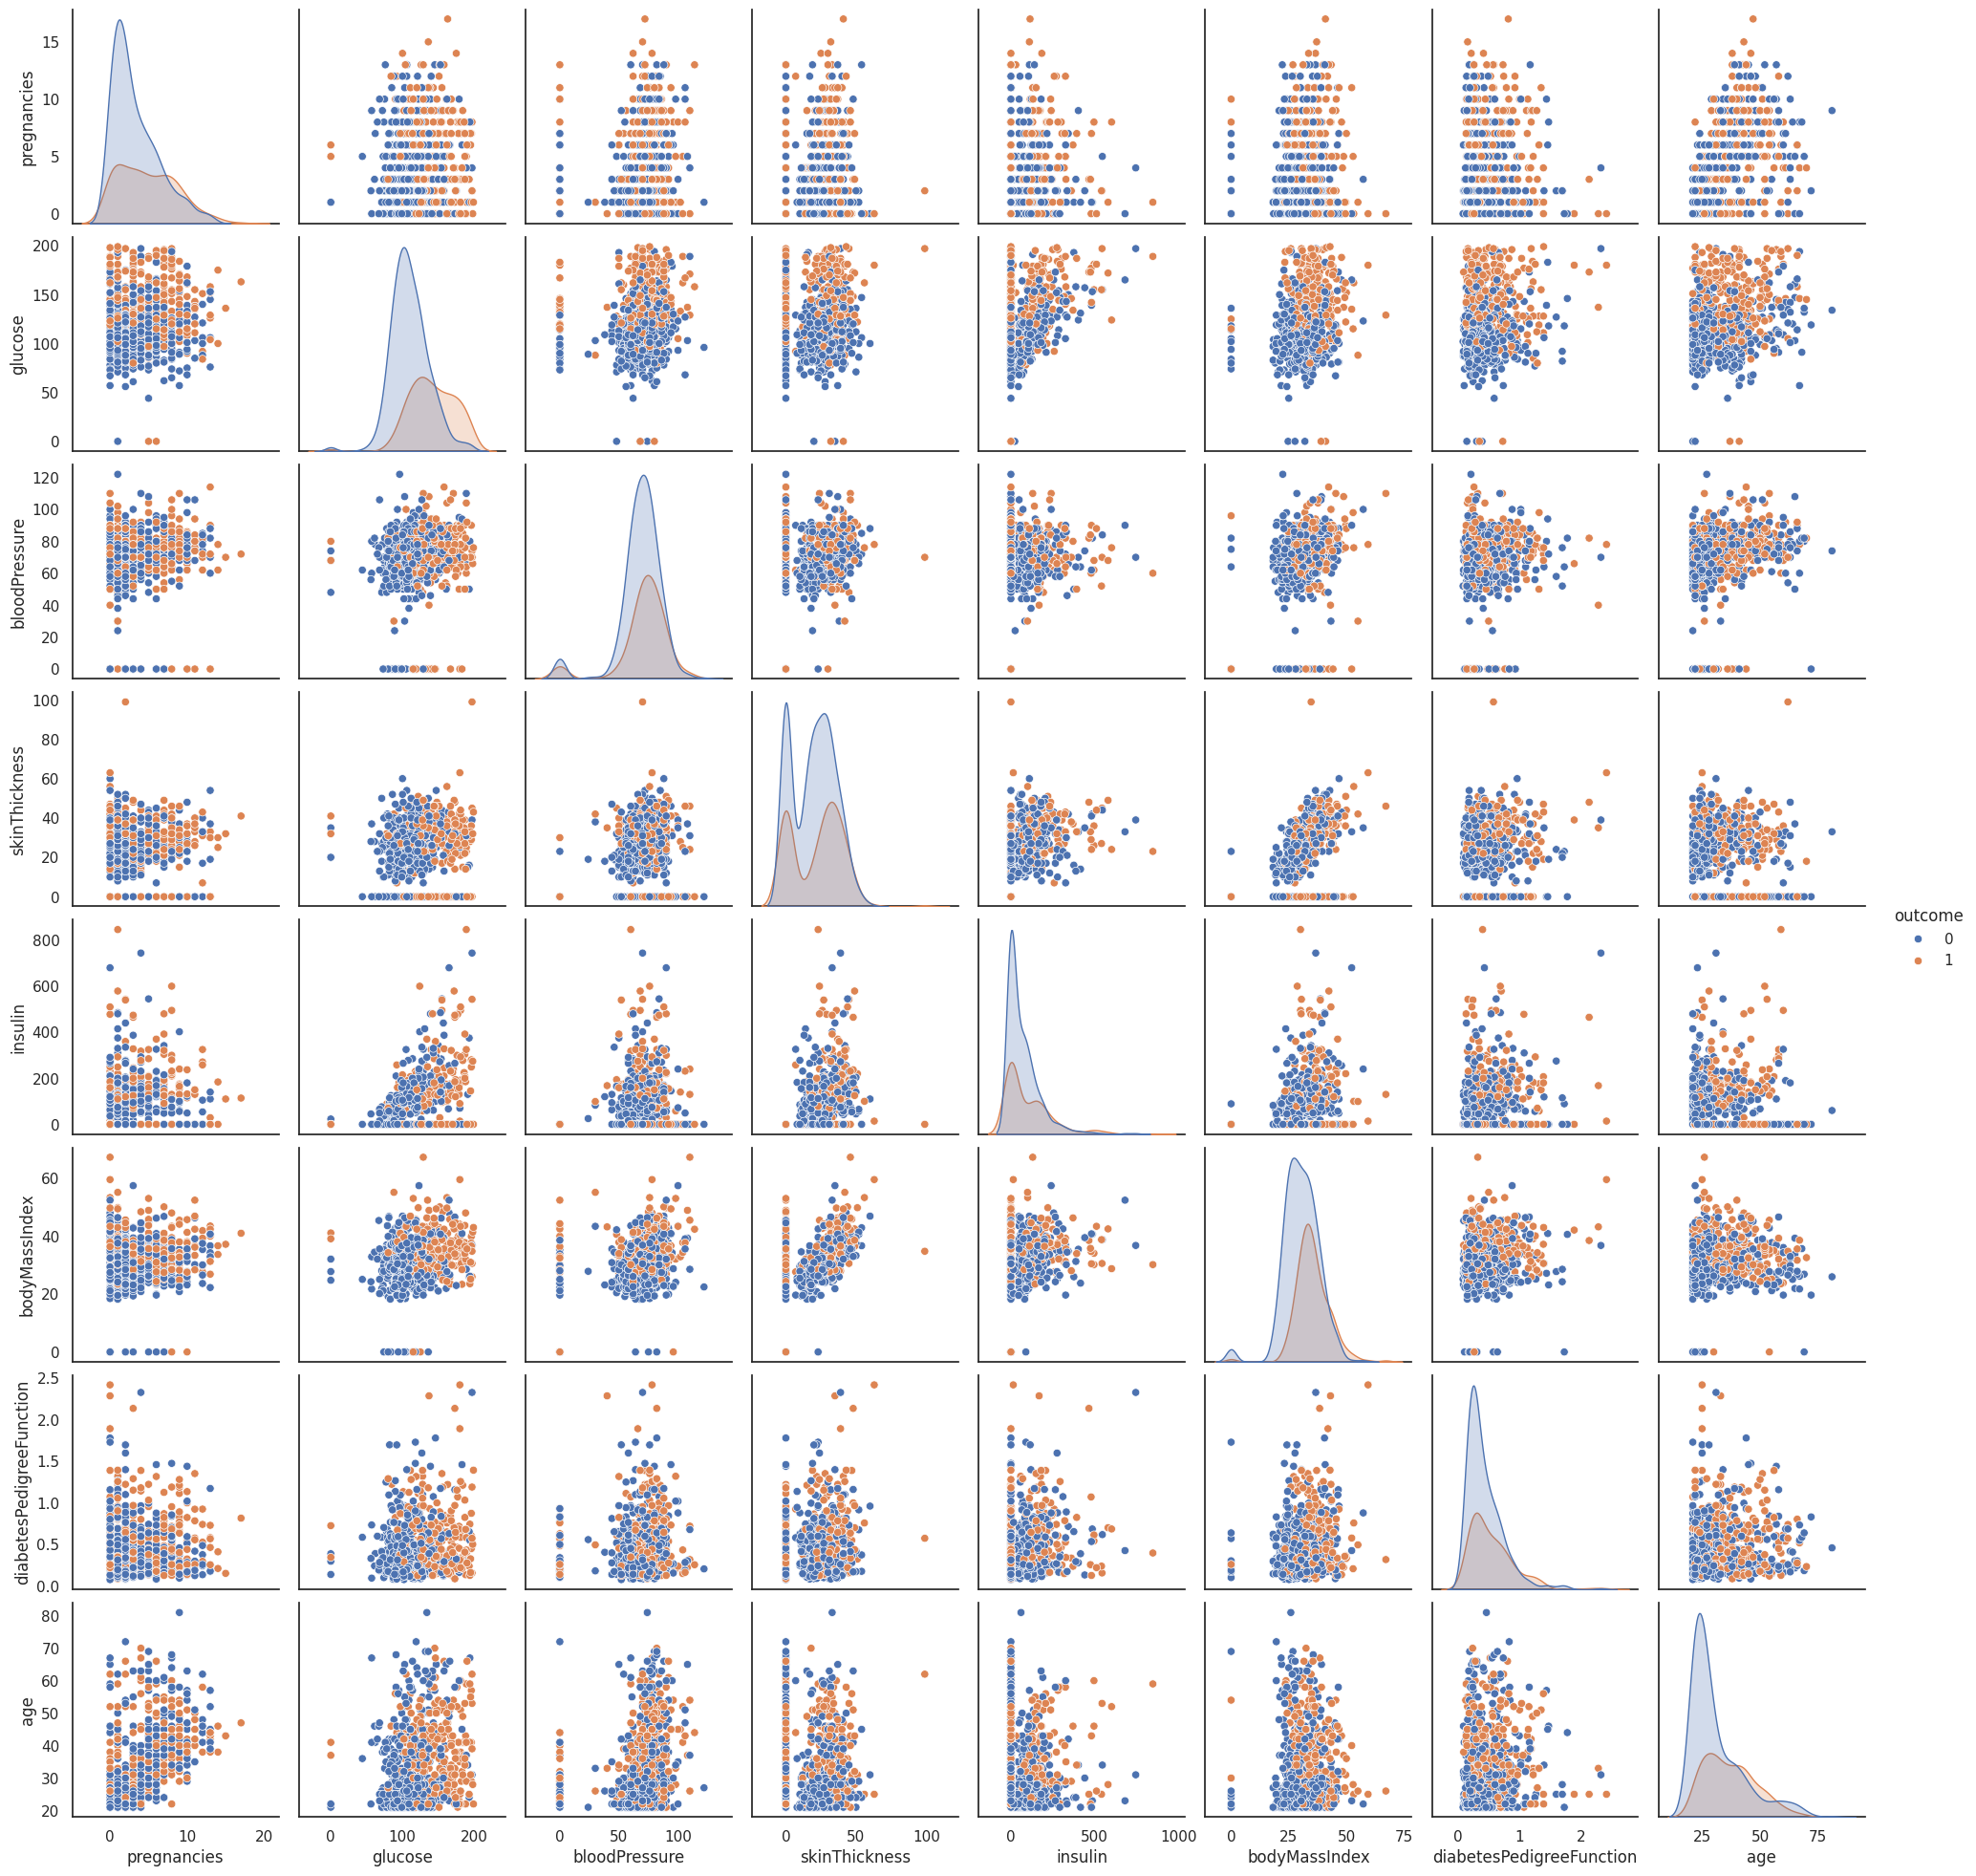

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pandas_df = df

sns.pairplot(data=pandas_df, hue="outcome")

plt.show()

In [ ]:
# Compute the number of zeros in each column
zero_counts = df.apply(lambda x: (x == 0).sum()).to_frame().T

print(zero_counts)

   pregnancies  glucose  bloodPressure  skinThickness  insulin  bodyMassIndex  \
0          111        5             35            227      374             11   

   diabetesPedigreeFunction  age  outcome  
0                         0    0      500  


In [ ]:
# Filter out rows with zeros in the Glucose, BloodPressure, and BMI columns
df = df[(df['glucose'] != 0) & (df['bloodPressure'] != 0) & (df['bodyMassIndex'] != 0)]

display(df)

pregnancies  glucose  bloodPressure  skinThickness  insulin  \
0              6      148             72             35        0   
1              1       85             66             29        0   
2              8      183             64              0        0   
3              1       89             66             23       94   
4              0      137             40             35      168   
..           ...      ...            ...            ...      ...   
763           10      101             76             48      180   
764            2      122             70             27        0   
765            5      121             72             23      112   
766            1      126             60              0        0   
767            1       93             70             31        0   

     bodyMassIndex  diabetesPedigreeFunction  age  outcome  
0             33.6                     0.627   50        1  
1             26.6                     0.351   31        0  
2             23.3                     0.672   32        1  
3             28.1                     0.167   21        0  
4             43.1                     2.288   33        1  
..             ...                       ...  ...      ...  
763           32.9                     0.171   63        0  
764           36.8                     0.340   27        0  
765           26.2                     0.245   30        0  
766           30.1                     0.349   47        1  
767           30.4                     0.315   23        0  

[724 rows x 9 columns]

In [ ]:
# Compute the number of zeros in each column
zero_counts = df.apply(lambda x: (x == 0).sum()).to_frame().T

print(zero_counts)

print("Deleted rows: ", initial_shape[0] - len(df))

   pregnancies  glucose  bloodPressure  skinThickness  insulin  bodyMassIndex  \
0           99        0              0            192      332              0   

   diabetesPedigreeFunction  age  outcome  
0                         0    0      475  
Deleted rows:  Pregnancies                 44
Glucose                     44
BloodPressure               44
SkinThickness               44
Insulin                     44
BMI                         44
DiabetesPedigreeFunction    44
Age                         44
Outcome                     44
dtype: int64


In [ ]:
# Replace zeros in Skin Thickness column for an average of the column using Pandas
avg_skin_thickness = df['skinThickness'].mean()

df['skinThickness'] = df['skinThickness'].replace(0, avg_skin_thickness)

display(df)

<ipython-input-70-938a55d7cc28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skinThickness'] = df['skinThickness'].replace(0, avg_skin_thickness)


pregnancies  glucose  bloodPressure  skinThickness  insulin  \
0              6      148             72       35.00000        0   
1              1       85             66       29.00000        0   
2              8      183             64       21.44337        0   
3              1       89             66       23.00000       94   
4              0      137             40       35.00000      168   
..           ...      ...            ...            ...      ...   
763           10      101             76       48.00000      180   
764            2      122             70       27.00000        0   
765            5      121             72       23.00000      112   
766            1      126             60       21.44337        0   
767            1       93             70       31.00000        0   

     bodyMassIndex  diabetesPedigreeFunction  age  outcome  
0             33.6                     0.627   50        1  
1             26.6                     0.351   31        0  
2             23.3                     0.672   32        1  
3             28.1                     0.167   21        0  
4             43.1                     2.288   33        1  
..             ...                       ...  ...      ...  
763           32.9                     0.171   63        0  
764           36.8                     0.340   27        0  
765           26.2                     0.245   30        0  
766           30.1                     0.349   47        1  
767           30.4                     0.315   23        0  

[724 rows x 9 columns]

In [ ]:
# Calculate the correlation between Glucose and Insulin using Pandas
correlation = df['glucose'].corr(df['insulin'])

print("Correlation between Glucose and Insulin:", correlation*100,"%")

Correlation between Glucose and Insulin: 33.78964168717819 %


In [ ]:
# Drop the Insulin column
df = df.drop("insulin", axis=1)
display(df)

pregnancies  glucose  bloodPressure  skinThickness  bodyMassIndex  \
0              6      148             72       35.00000           33.6   
1              1       85             66       29.00000           26.6   
2              8      183             64       21.44337           23.3   
3              1       89             66       23.00000           28.1   
4              0      137             40       35.00000           43.1   
..           ...      ...            ...            ...            ...   
763           10      101             76       48.00000           32.9   
764            2      122             70       27.00000           36.8   
765            5      121             72       23.00000           26.2   
766            1      126             60       21.44337           30.1   
767            1       93             70       31.00000           30.4   

     diabetesPedigreeFunction  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[724 rows x 8 columns]

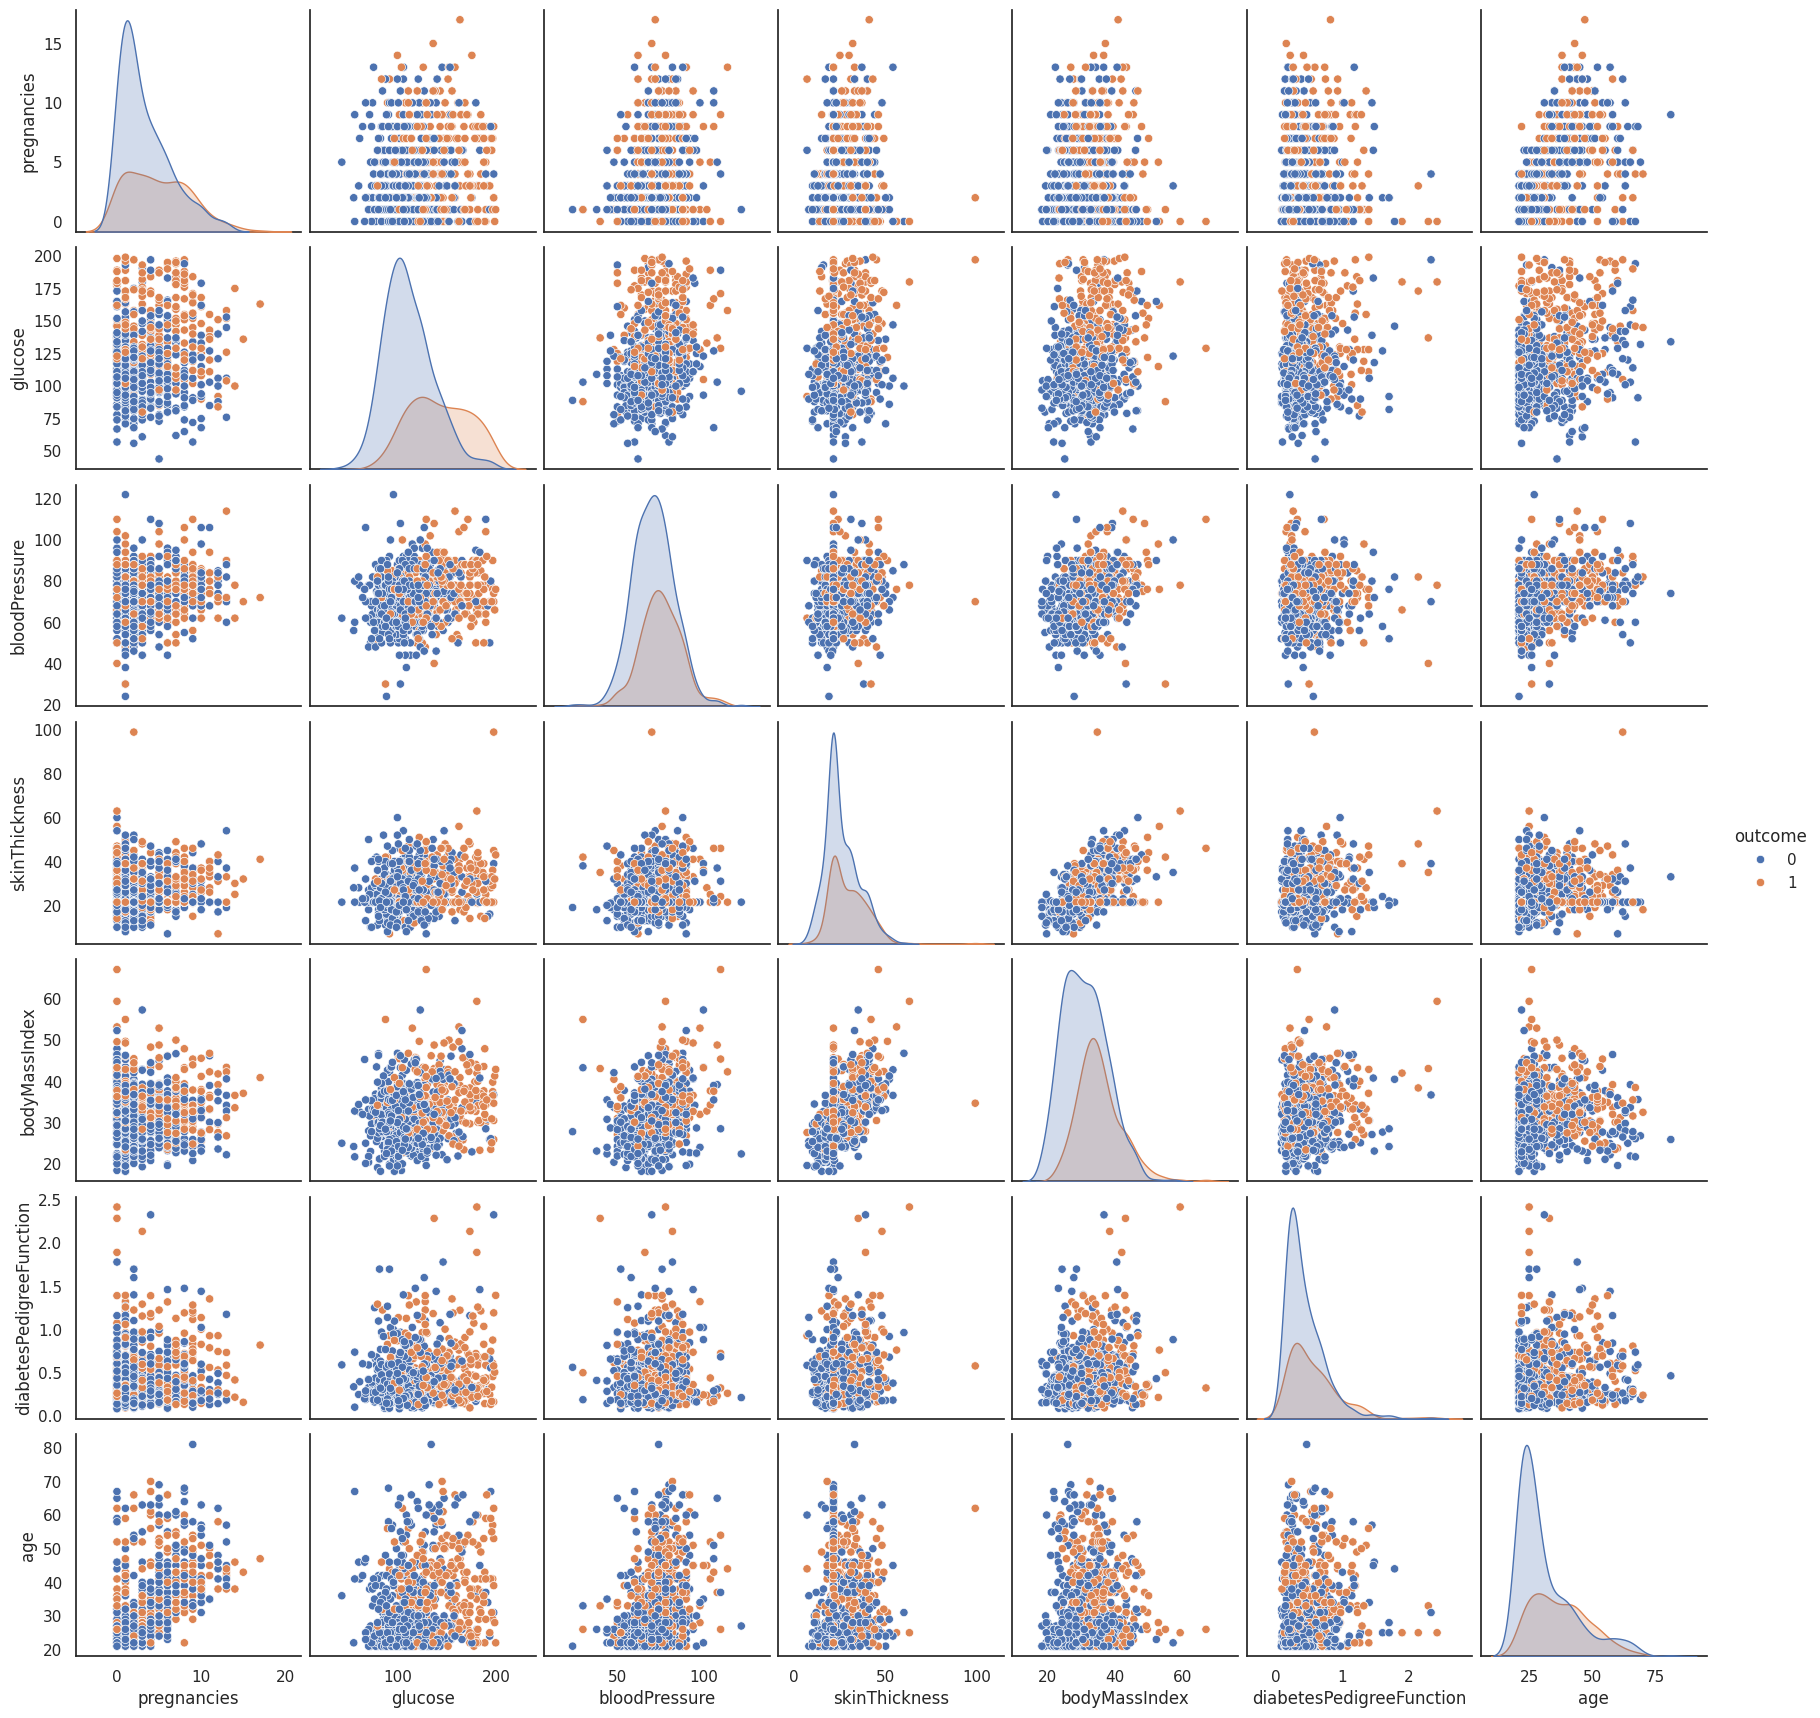

In [ ]:
pandas_df = df
sns.pairplot(data=pandas_df, hue="outcome")
plt.show()

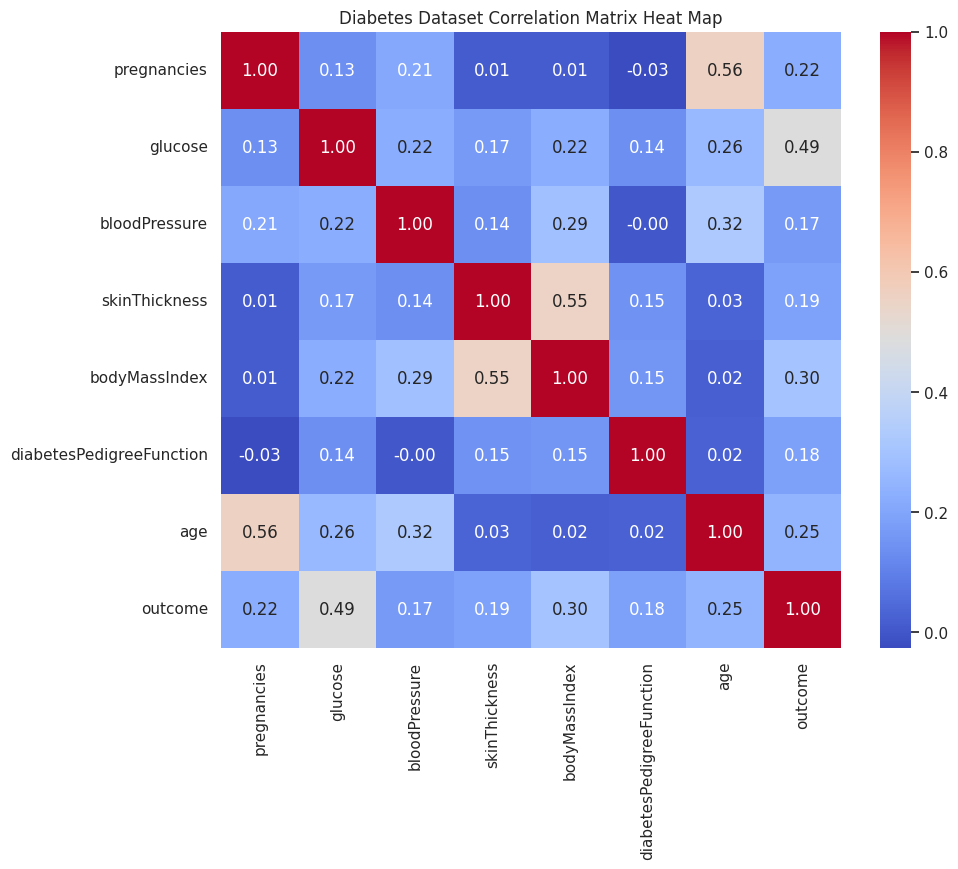

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()
sns.set(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
ax.set_title("Diabetes Dataset Correlation Matrix Heat Map")
plt.show()

In [ ]:
# Count the number of samples in each class
counts = df['outcome'].value_counts()
minority_class_count = counts.min()
majority_class_count = counts.max()

balanced = (majority_class_count - minority_class_count) / (majority_class_count + minority_class_count) < 0.20

print(f"is the dataset balanced? {balanced}")

is the dataset balanced? False


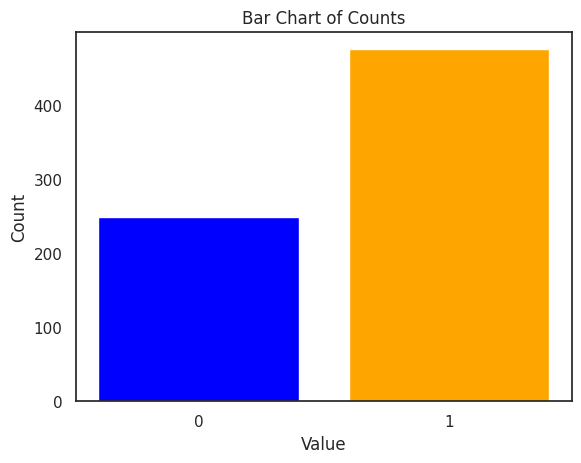

In [ ]:
# Define the counts and values for each bar
counts_list = [minority_class_count, majority_class_count]
values = counts.index
colors = ["blue", "orange"]

plt.bar(values, counts_list, color=colors)
plt.title("Bar Chart of Counts")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(values)

plt.show()

In [ ]:
# Compute the sampling fraction for the majority class
sampling_fraction = minority_class_count / majority_class_count

# Randomly sample from the majority class
majority_class_df = df[df['outcome'] == 0]
sampled_majority_class_df = majority_class_df.sample(frac=sampling_fraction, random_state=42)

# Combine the sampled majority class with the original minority class
df = pd.concat([df[df['outcome'] == 1], sampled_majority_class_df])

# Display the resulting DataFrame
display(df)

pregnancies  glucose  bloodPressure  skinThickness  bodyMassIndex  \
0              6      148             72       35.00000           33.6   
2              8      183             64       21.44337           23.3   
4              0      137             40       35.00000           43.1   
6              3       78             50       32.00000           31.0   
8              2      197             70       45.00000           30.5   
..           ...      ...            ...            ...            ...   
410            6      102             90       39.00000           35.7   
578           10      133             68       21.44337           27.0   
555            7      124             70       33.00000           25.5   
487            0      173             78       32.00000           46.5   
160            4      151             90       38.00000           29.7   

     diabetesPedigreeFunction  age  outcome  
0                       0.627   50        1  
2                       0.672   32        1  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
..                        ...  ...      ...  
410                     0.674   28        0  
578                     0.245   36        0  
555                     0.161   37        0  
487                     1.159   58        0  
160                     0.294   36        0  

[498 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = df.columns[:-1]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
display(df)

pregnancies   glucose  bloodPressure  skinThickness  bodyMassIndex  \
0       0.352941  0.670968       0.456522       0.304348       0.314928   
2       0.470588  0.896774       0.369565       0.156993       0.104294   
4       0.000000  0.600000       0.108696       0.304348       0.509202   
6       0.176471  0.219355       0.217391       0.271739       0.261759   
8       0.117647  0.987097       0.434783       0.413043       0.251534   
..           ...       ...            ...            ...            ...   
410     0.352941  0.374194       0.652174       0.347826       0.357873   
578     0.588235  0.574194       0.413043       0.156993       0.179959   
555     0.411765  0.516129       0.434783       0.282609       0.149284   
487     0.000000  0.832258       0.521739       0.271739       0.578732   
160     0.235294  0.690323       0.652174       0.336957       0.235174   

     diabetesPedigreeFunction       age  outcome  
0                    0.234415  0.483333        1  
2                    0.253629  0.183333        1  
4                    0.943638  0.200000        1  
6                    0.072588  0.083333        1  
8                    0.034159  0.533333        1  
..                        ...       ...      ...  
410                  0.254483  0.116667        0  
578                  0.071307  0.250000        0  
555                  0.035440  0.266667        0  
487                  0.461571  0.616667        0  
160                  0.092229  0.250000        0  

[498 rows x 8 columns]

In [ ]:
(majority_class_count,minority_class_count)

(475, 249)

In [ ]:
# Compute the sampling fraction for the majority class
sampling_fraction = minority_class_count / majority_class_count

majority_class_df = df[df['outcome'] == 0]
sampled_majority_class_df = majority_class_df.sample(frac=sampling_fraction, random_state=42)

df = pd.concat([df[df['outcome'] == 1], sampled_majority_class_df])
display(df)

pregnancies   glucose  bloodPressure  skinThickness  bodyMassIndex  \
0       0.352941  0.670968       0.456522       0.304348       0.314928   
2       0.470588  0.896774       0.369565       0.156993       0.104294   
4       0.000000  0.600000       0.108696       0.304348       0.509202   
6       0.176471  0.219355       0.217391       0.271739       0.261759   
8       0.117647  0.987097       0.434783       0.413043       0.251534   
..           ...       ...            ...            ...            ...   
764     0.117647  0.503226       0.434783       0.217391       0.380368   
634     0.588235  0.309677       0.347826       0.156993       0.157464   
674     0.470588  0.303226       0.565217       0.156993       0.355828   
762     0.529412  0.290323       0.347826       0.156993       0.087935   
246     0.588235  0.503226       0.413043       0.156993       0.265849   

     diabetesPedigreeFunction       age  outcome  
0                    0.234415  0.483333        1  
2                    0.253629  0.183333        1  
4                    0.943638  0.200000        1  
6                    0.072588  0.083333        1  
8                    0.034159  0.533333        1  
..                        ...       ...      ...  
764                  0.111870  0.100000        0  
634                  0.038002  0.166667        0  
674                  0.217336  0.783333        0  
762                  0.027327  0.200000        0  
246                  0.076857  0.333333        0  

[380 rows x 8 columns]

In [ ]:
shape(df)

(pregnancies                 380
 glucose                     380
 bloodPressure               380
 skinThickness               380
 bodyMassIndex               380
 diabetesPedigreeFunction    380
 age                         380
 outcome                     380
 dtype: int64,
 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = df.columns[:-1]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

display(df)

pregnancies   glucose  bloodPressure  skinThickness  bodyMassIndex  \
0       0.352941  0.640845       0.500000       0.304348       0.314928   
2       0.470588  0.887324       0.404762       0.156993       0.104294   
4       0.000000  0.563380       0.119048       0.304348       0.509202   
6       0.176471  0.147887       0.238095       0.271739       0.261759   
8       0.117647  0.985915       0.476190       0.413043       0.251534   
..           ...       ...            ...            ...            ...   
764     0.117647  0.457746       0.476190       0.217391       0.380368   
634     0.588235  0.246479       0.380952       0.156993       0.157464   
674     0.470588  0.239437       0.619048       0.156993       0.355828   
762     0.529412  0.225352       0.380952       0.156993       0.087935   
246     0.588235  0.457746       0.452381       0.156993       0.265849   

     diabetesPedigreeFunction       age  outcome  
0                    0.234415  0.591837        1  
2                    0.253629  0.224490        1  
4                    0.943638  0.244898        1  
6                    0.072588  0.102041        1  
8                    0.034159  0.653061        1  
..                        ...       ...      ...  
764                  0.111870  0.122449        0  
634                  0.038002  0.204082        0  
674                  0.217336  0.959184        0  
762                  0.027327  0.244898        0  
246                  0.076857  0.408163        0  

[380 rows x 8 columns]

## Model

In [ ]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[cols_to_scale]  # Features
y = df['outcome']     # Target variable

In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()
lrModel = lr.fit(train_data, train_labels)

In [ ]:
predictions = lrModel.predict(test_data)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6973684210526315


## Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression Evaluation (Binary Classification)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
lr_auc = roc_auc_score(test_labels, predictions)

print("\n--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {lr_auc}")


--- Logistic Regression Metrics ---
Accuracy: 0.6973684210526315
Precision: 0.75
Recall: 0.8235294117647058
F1 Score: 0.7850467289719626
AUC: 0.6317647058823529


## Hyperparameter Tunning

In [ ]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
lr = LogisticRegression()

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy') # cv=5 untuk 5-fold cross-validation
grid_search.fit(train_data, train_labels)

# Get the best model from Grid Search
best_lr_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_lr_model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
lr_auc = roc_auc_score(test_labels, predictions)

print("\n--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {lr_auc}")


--- Logistic Regression Metrics ---
Accuracy: 0.7236842105263158
Precision: 0.7586206896551724
Recall: 0.8627450980392157
F1 Score: 0.8073394495412844
AUC: 0.6513725490196078


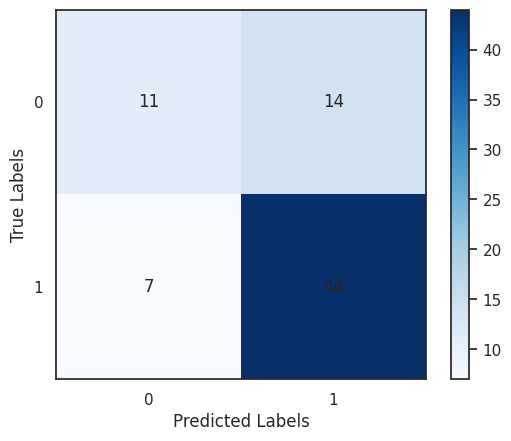

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

lr_predictions_tuned = pd.DataFrame({'outcome': test_labels, 'prediction': predictions})

c_matrix_lr = pd.crosstab(lr_predictions_tuned['outcome'], lr_predictions_tuned['prediction'],
                           rownames=['Actual'], colnames=['Predicted'])

plt.imshow(c_matrix_lr, cmap=plt.cm.Blues)

plt.xticks([0, 1], c_matrix_lr.columns)
plt.yticks([0, 1], c_matrix_lr.index)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.colorbar()

for i in range(c_matrix_lr.shape[0]):
    for j in range(c_matrix_lr.shape[1]):
        plt.text(j, i, c_matrix_lr.iloc[i, j], ha='center', va='center')

plt.show()

## Testing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def predict_diabetes(features, input_cols, scaler, model):
    """
    Predict diabetes using a pandas DataFrame approach.

    :param features: A dictionary or pandas DataFrame containing feature values.
    :param input_cols: List of column names used as input features.
    :param scaler: A fitted MinMaxScaler object.
    :param model: A trained model with a `.predict` method.
    :return: The predicted outcome.
    """
    # Ensure input is a pandas DataFrame
    if not isinstance(features, pd.DataFrame):
        features_df = pd.DataFrame([features], columns=input_cols)
    else:
        features_df = features[input_cols]

    # Apply MinMaxScaler to normalize data
    features_scaled = scaler.transform(features_df)

    # Make predictions using the trained model
    predicted_outcome = model.predict(features_scaled)

    return predicted_outcome[0]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Example features as a dictionary
example_features = {
    'pregnancies': 6,
    'glucose': 148,
    'bloodPressure': 72,
    'skinThickness': 35,
    'bodyMassIndex': 33.6,
    'diabetesPedigreeFunction': 0.627,
    'age': 50
}

# Define input_cols based on your DataFrame's columns
input_cols = ['pregnancies', 'glucose', 'bloodPressure', 'skinThickness', 'bodyMassIndex', 'diabetesPedigreeFunction', 'age']

example_features_df = pd.DataFrame([example_features])

predicted_class = predict_diabetes(example_features_df, input_cols, scaler, best_lr_model)

print(f"Klasifikasi kelas (0 tidak terkena diabetes, 1 terkena diabetes): {predicted_class}")

Klasifikasi kelas (0 tidak terkena diabetes, 1 terkena diabetes): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
